<a href="https://colab.research.google.com/github/SatyamPatidar30/Data-cleaning-Projects/blob/main/Data_analysis_Project_(Hotel_Booking).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**




In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# **Loading the dataset**

In [6]:
df = pd.read_csv('hotel_booking.csv')

# **Exploratory Data Analysis and Data Cleaning**

In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0.0,0.0,Check-Out,01-07-2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0.0,0.0,Check-Out,01-07-2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0.0,0.0,Check-Out,02-07-2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0.0,0.0,Check-Out,02-07-2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0.0,1.0,Check-Out,03-07-2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [8]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
50678,City Hotel,1,259,2016,May,19,5,0,3,2,...,Transient,90.00,0.0,0.0,Canceled,19-10-2015,Mrs. Meghan Lee,Lee.Mrs.@protonmail.com,742-619-0317,************1860
50679,City Hotel,1,204,2016,May,19,5,0,3,1,...,Transient,90.00,0.0,0.0,Canceled,18-01-2016,Donald Dixon,Dixon.Donald@outlook.com,852-234-7658,************6245
50680,City Hotel,1,204,2016,May,19,5,0,3,1,...,Transient,90.00,0.0,0.0,Canceled,18-01-2016,Donna Williams,Donna_W@comcast.net,551-100-1539,************7725
50681,City Hotel,0,288,2016,May,19,5,0,3,2,...,Transient-Party,81.67,0.0,0.0,Check-Out,08-05-2016,Timothy Clarke,Timothy.C13@aol.com,388-775-9562,************3667
50682,City Hotel,0,288,2016,May,19,5,0,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.shape

(50683, 36)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           50683 non-null  object 
 1   is_canceled                     50683 non-null  int64  
 2   lead_time                       50683 non-null  int64  
 3   arrival_date_year               50683 non-null  int64  
 4   arrival_date_month              50683 non-null  object 
 5   arrival_date_week_number        50683 non-null  int64  
 6   arrival_date_day_of_month       50683 non-null  int64  
 7   stays_in_weekend_nights         50683 non-null  int64  
 8   stays_in_week_nights            50683 non-null  int64  
 9   adults                          50683 non-null  int64  
 10  children                        50679 non-null  float64
 11  babies                          50683 non-null  int64  
 12  meal                            

converting data type of target variable reservation_status_date to date time

In [11]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [12]:
df.duplicated().sum()

0

Deleting customer personal details column

In [13]:
df.drop(columns = [ 'name', 'email', 'phone-number', 'credit_card'], inplace = True)

In [14]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,50683,50683,50683,50205,50682,50682,50682,50682,50682,50682,50682
unique,2,12,5,135,8,5,10,12,3,4,3
top,Resort Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,40060,6472,38194,23207,21892,38666,32737,25114,46866,36019,34061


Listing unique values of all categorical columns

In [15]:
for col in df.describe(include = 'object').columns:
  print(col)
  print(df[col].unique())
  print("-"*100)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK

In [16]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             478
market_segment                        1
distribution_channel                  1
is_repeated_guest                     1
previous_cancellations                1
previous_bookings_not_canceled        1
reserved_room_type                    1
assigned_room_type                    1
booking_changes                       1
deposit_type                          1
agent                              8831
company                           47350


Dropping columns: Agent, Company (Too many missing values)

In [17]:
df.drop(['agent','company'], axis = 1, inplace = True)

Dropping missing rows from the dataset

In [18]:
df.dropna(inplace = True)

In [19]:
df.shape

(50200, 30)

In [20]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [21]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,50200.000000,50200.000000,50200.000000,50200.000000,50200.000000,50200.000000,50200.000000,50200.000000,50200.000000,50200.000000,50200.000000,50200.000000,50200.000000,50200.000000,50200.000000,50200.000000,50200.000000,50200.000000
mean,0.329841,89.602968,2015.971335,27.331295,15.845936,1.117390,2.942669,1.861335,0.116135,0.012131,0.035339,0.080378,0.102590,0.262470,2.166096,94.176704,0.110896,0.559821
std,0.470160,92.599157,0.741463,13.982988,8.840813,1.110314,2.313706,0.654226,0.425837,0.118727,0.184636,1.193042,0.831817,0.699348,14.836174,61.307579,0.319291,0.789762
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,13.000000,2015.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,0.000000,0.000000
50%,0.000000,60.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.000000,0.000000,0.000000
75%,1.000000,141.000000,2017.000000,39.000000,24.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,10.000000,1.000000,26.000000,30.000000,20.000000,259.000000,5400.000000,8.000000,5.000000


<Axes: xlabel='adr'>

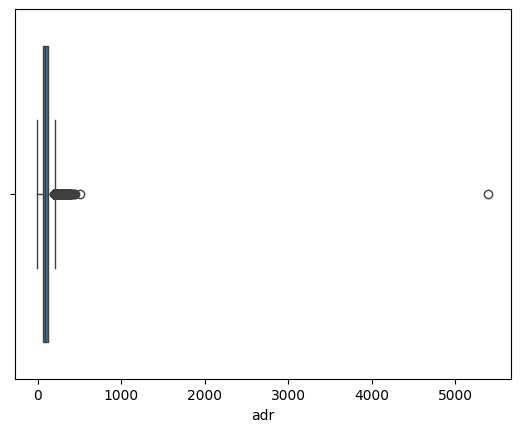

In [22]:
sns.boxplot(x = 'adr', data = df)

Removing outlier

In [23]:
df = df[df['adr'] < 5000]

In [24]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,50199.000000,50199.000000,50199.000000,50199.000000,50199.000000,50199.000000,50199.000000,50199.000000,50199.000000,50199.000000,50199.000000,50199.000000,50199.000000,50199.000000,50199.000000,50199.000000,50199.000000,50199.000000
mean,0.329827,89.604056,2015.971334,27.331580,15.845754,1.117413,2.942708,1.861332,0.116138,0.012132,0.035339,0.080380,0.102592,0.262455,2.166139,94.071008,0.110899,0.559832
std,0.470155,92.599759,0.741470,13.982981,8.840807,1.110314,2.313713,0.654232,0.425841,0.118728,0.184638,1.193054,0.831825,0.699347,14.836319,56.549700,0.319294,0.789766
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,13.000000,2015.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,0.000000,0.000000
50%,0.000000,60.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.000000,0.000000,0.000000
75%,1.000000,141.000000,2017.000000,39.000000,24.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,10.000000,1.000000,26.000000,30.000000,20.000000,259.000000,508.000000,8.000000,5.000000


# **Data Analysis and Visualization**

Finding booking cancellation percentage


In [25]:
cancelled_per = df['is_canceled'].value_counts(normalize = True)
cancelled_per

0    0.670173
1    0.329827
Name: is_canceled, dtype: float64



*   Not Cancelled = 0.628653
*   Cancelled =  0.371347



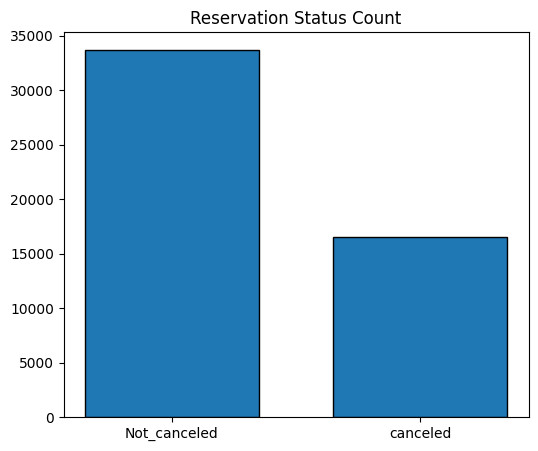

In [26]:
plt.figure(figsize = (6,5))
plt.title('Reservation Status Count')
plt.bar(['Not_canceled', 'canceled'], df['is_canceled'].value_counts(), edgecolor = 'k', width =0.7)
plt.show()

Finding cancellation status according to hotels


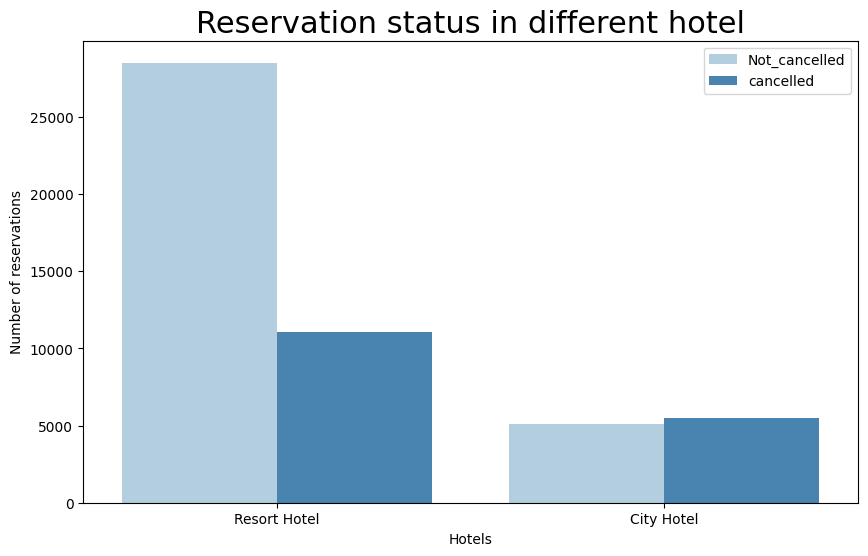

In [27]:
plt.figure(figsize = (10,6))
ax1 = sns.countplot(data =df, x = 'hotel', hue = 'is_canceled', palette = 'Blues')
plt.title('Reservation status in different hotel', size = 22)
plt.legend(['Not_cancelled', 'cancelled'])
plt.xlabel('Hotels')
plt.ylabel('Number of reservations')
plt.show()


In [28]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

Resort Hotel reservation status

*   Not cancelled = 0.72025
*   Cancelled = 0.27975


In [29]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

1    0.516835
0    0.483165
Name: is_canceled, dtype: float64

City Hotel reservation status

*   Not Cancelled = 0.582918
*   Cancelled = 0.417082



In [30]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

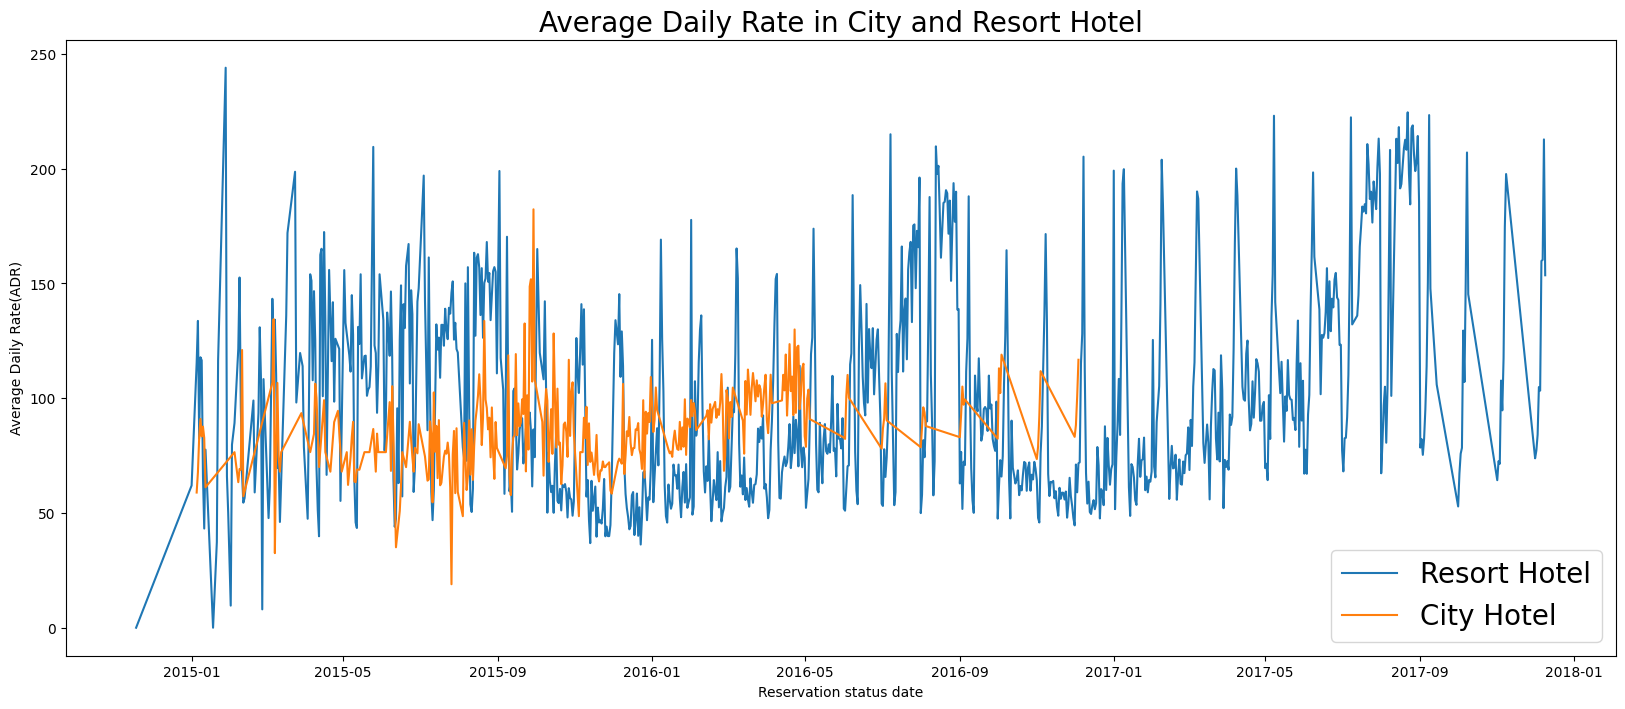

In [31]:
plt.figure(figsize = (20, 8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 20)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.ylabel('Average Daily Rate(ADR)')
plt.xlabel('Reservation status date')
plt.show()

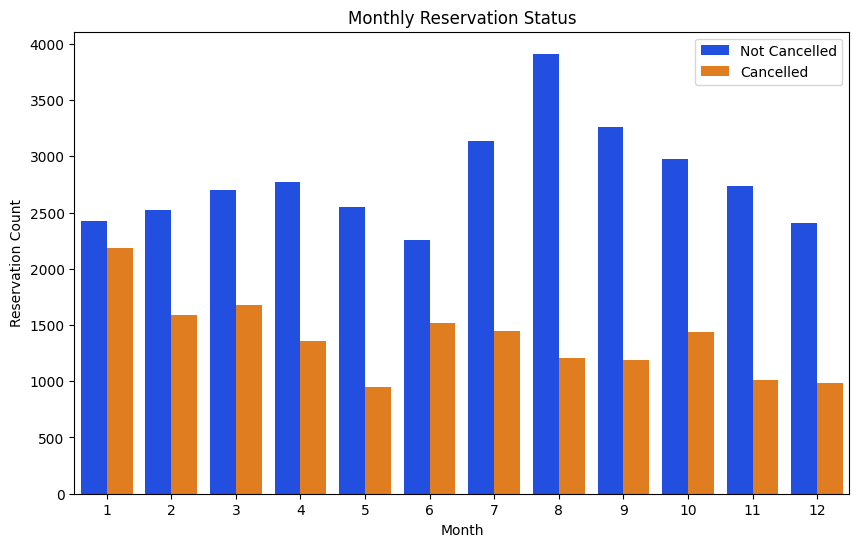

In [32]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize =(10,6))
sns.countplot(data = df, x = 'month', hue = 'is_canceled', palette = 'bright')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.title('Monthly Reservation Status')
plt.ylabel('Reservation Count')
plt.xlabel('Month')
plt.show()


In [33]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
city_hotel = df[df['hotel'] == 'City Hotel']

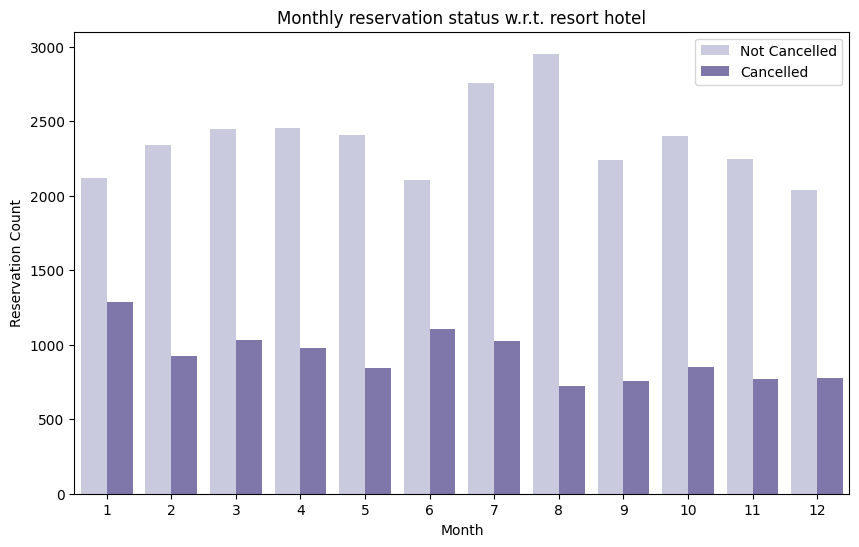

In [34]:
plt.figure(figsize = (10,6))
sns.countplot(data = resort_hotel, x = 'month', hue = 'is_canceled', palette = 'Purples')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.title('Monthly reservation status w.r.t. resort hotel')
plt.ylabel('Reservation Count')
plt.xlabel('Month')
plt.show()

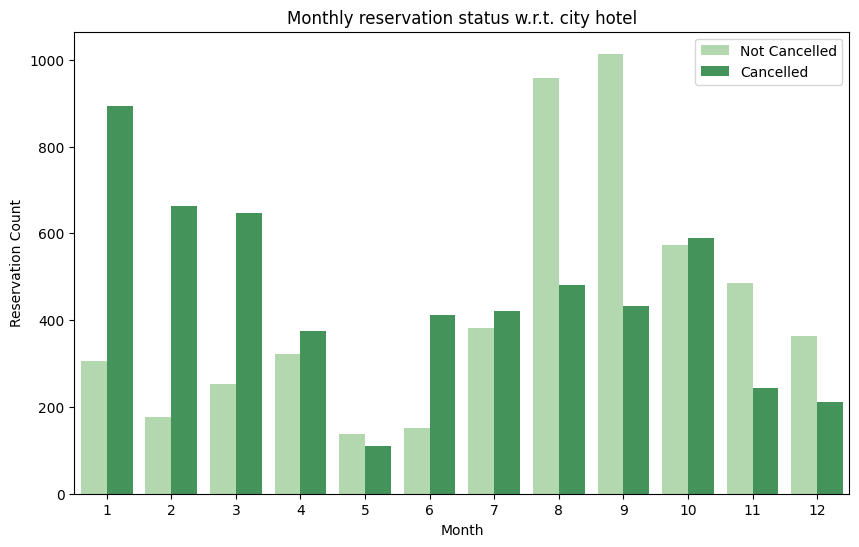

In [35]:
plt.figure(figsize = (10,6))
sns.countplot(data = city_hotel, x = 'month', hue = 'is_canceled', palette = 'Greens')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.title('Monthly reservation status w.r.t. city hotel')
plt.ylabel('Reservation Count')
plt.xlabel('Month')
plt.show()


ADR by month for cancelled reservation only

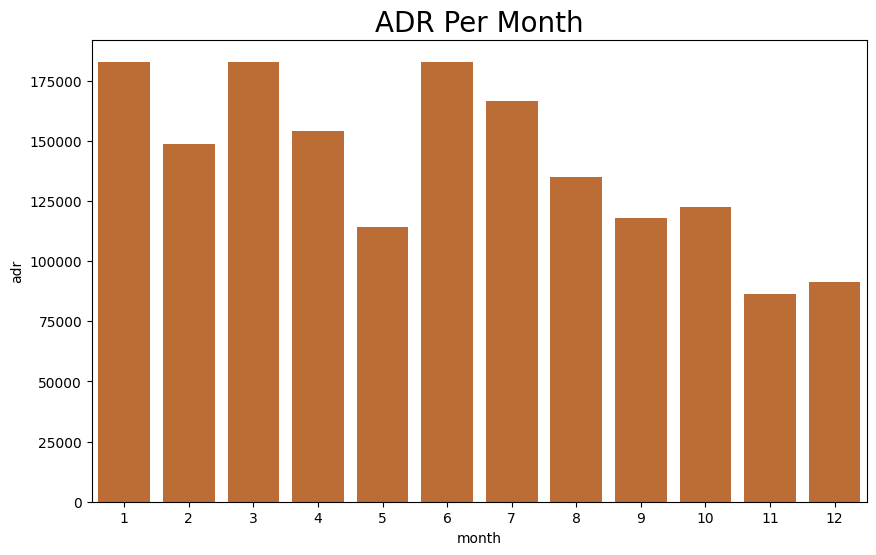

In [36]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'month', y = 'adr', data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index(), color = 'chocolate')
plt.title('ADR Per Month', fontsize = 20)
plt.show()

In [37]:
cancelled_city = df[(df['is_canceled'] == 1) & (df['hotel'] == 'City Hotel')].groupby('month')[['adr']].sum().reset_index()
cancelled_resort = df[(df['is_canceled'] == 1) & (df['hotel'] == 'Resort Hotel')].groupby('month')[['adr']].sum().reset_index()

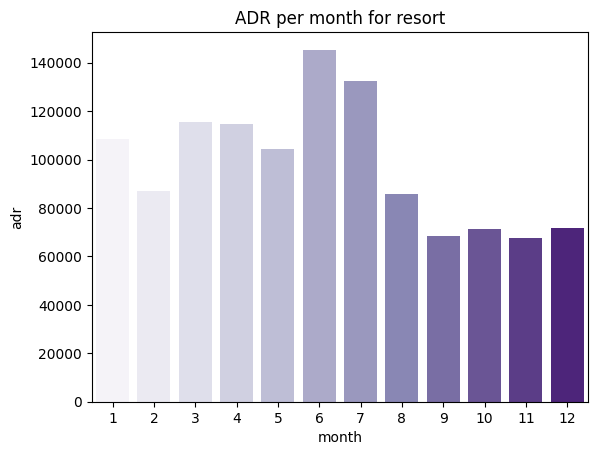

In [38]:
plt.title('ADR per month for resort')
sns.barplot(x = 'month', y = 'adr', data = cancelled_resort, palette = 'Purples')
plt.show()

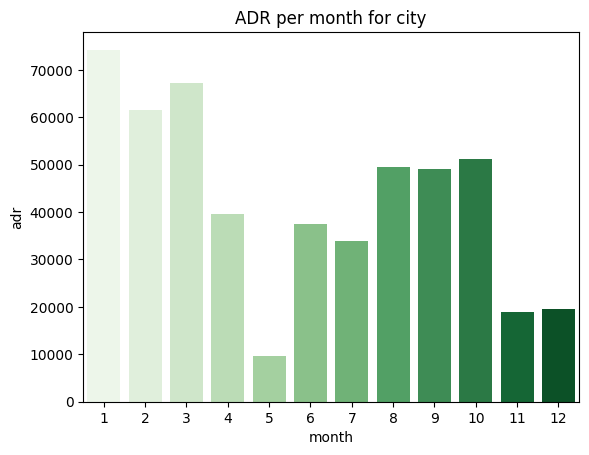

In [39]:
plt.title('ADR per month for city')
sns.barplot(x = 'month', y = 'adr', data = cancelled_city, palette = 'Greens')
plt.show()

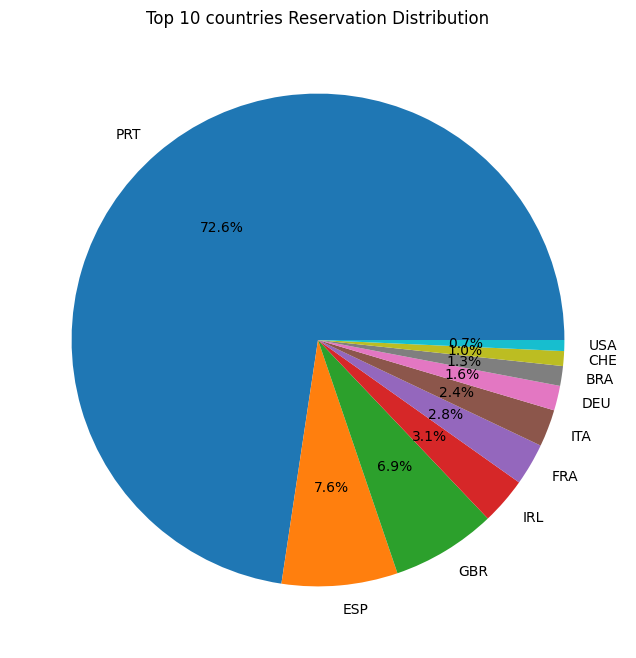

In [40]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries Reservation Distribution')
plt.pie(top_10_country, autopct = '%.1f%%', labels = top_10_country.index)
plt.show()

In [41]:
df['market_segment'].value_counts()

Online TA        21817
Offline TA/TO    10270
Groups            8597
Direct            6947
Corporate         2320
Complementary      244
Aviation             4
Name: market_segment, dtype: int64

In [42]:
df['market_segment'].value_counts(normalize = True)

Online TA        0.434610
Offline TA/TO    0.204586
Groups           0.171258
Direct           0.138389
Corporate        0.046216
Complementary    0.004861
Aviation         0.000080
Name: market_segment, dtype: float64

In [43]:
cancelled_data['market_segment'].value_counts(normalize = True)

Online TA        0.508123
Groups           0.237241
Offline TA/TO    0.164281
Direct           0.062813
Corporate        0.024642
Complementary    0.002657
Aviation         0.000242
Name: market_segment, dtype: float64

In [44]:
cancelled_df_adr = df[df['is_canceled'] == 1].groupby('reservation_status_date')[['adr']].mean().reset_index()
not_cancelled_df_adr = df[df['is_canceled'] == 0].groupby('reservation_status_date')[['adr']].mean().reset_index()

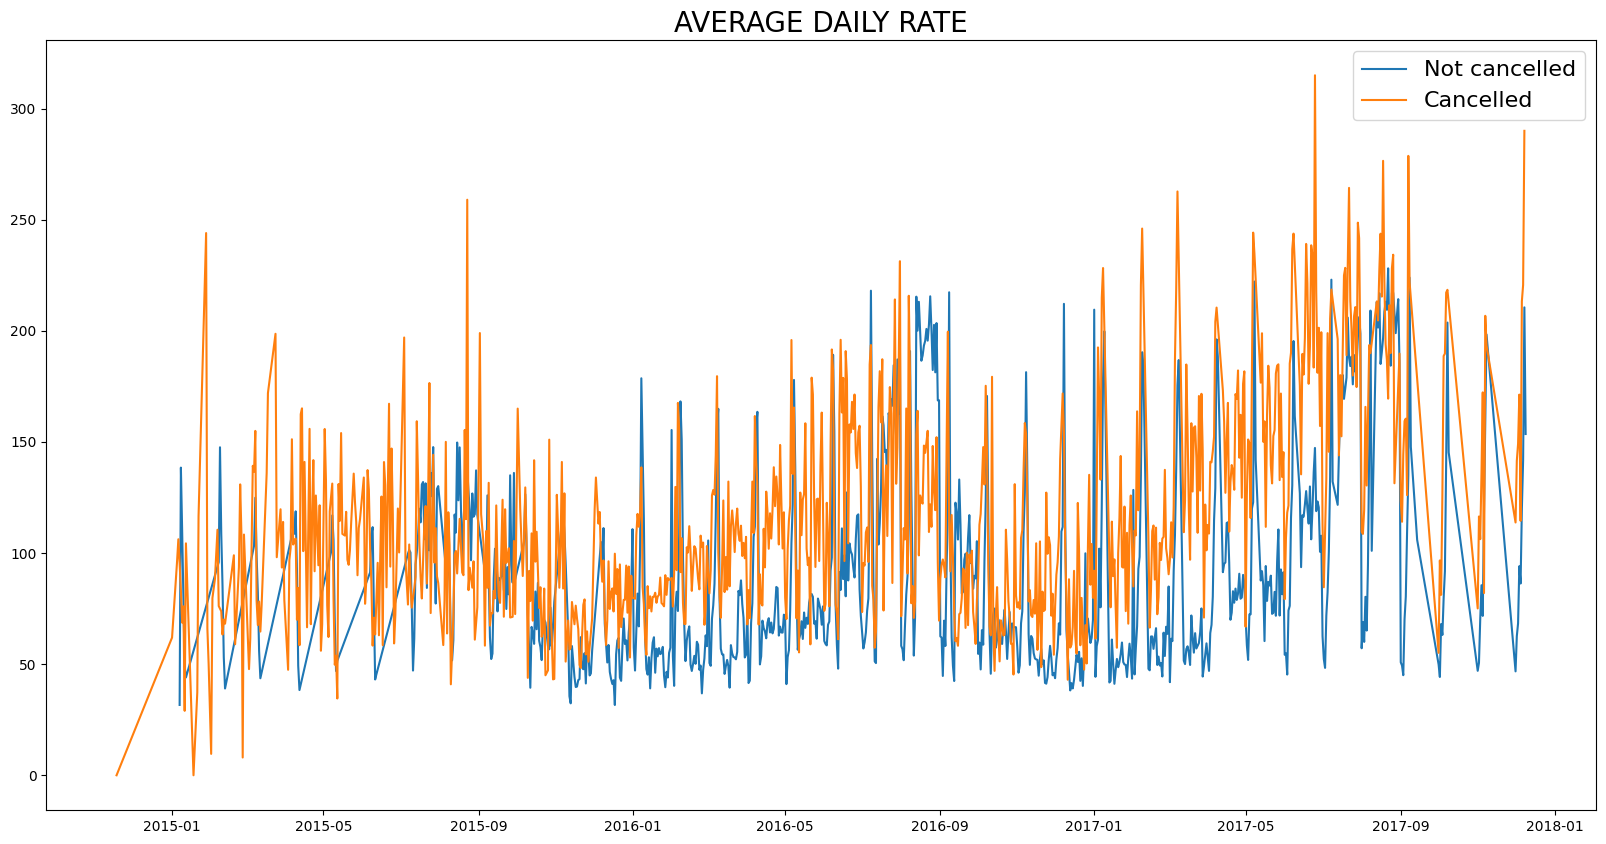

In [45]:
plt.figure(figsize = (20,10))
plt.title('AVERAGE DAILY RATE', fontsize = 20)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'Not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'Cancelled')
plt.legend(fontsize = 16)
plt.show()



> Filtering data from 2016






In [46]:
cancelled_df_adr = df[(df['is_canceled'] == 1) & (df['reservation_status_date'] > '2016')]. groupby('reservation_status_date')[['adr']].mean().reset_index()
not_cancelled_df_adr = df[(df['is_canceled'] == 0) & (df['reservation_status_date'] > '2016')]. groupby('reservation_status_date')[['adr']].mean().reset_index()

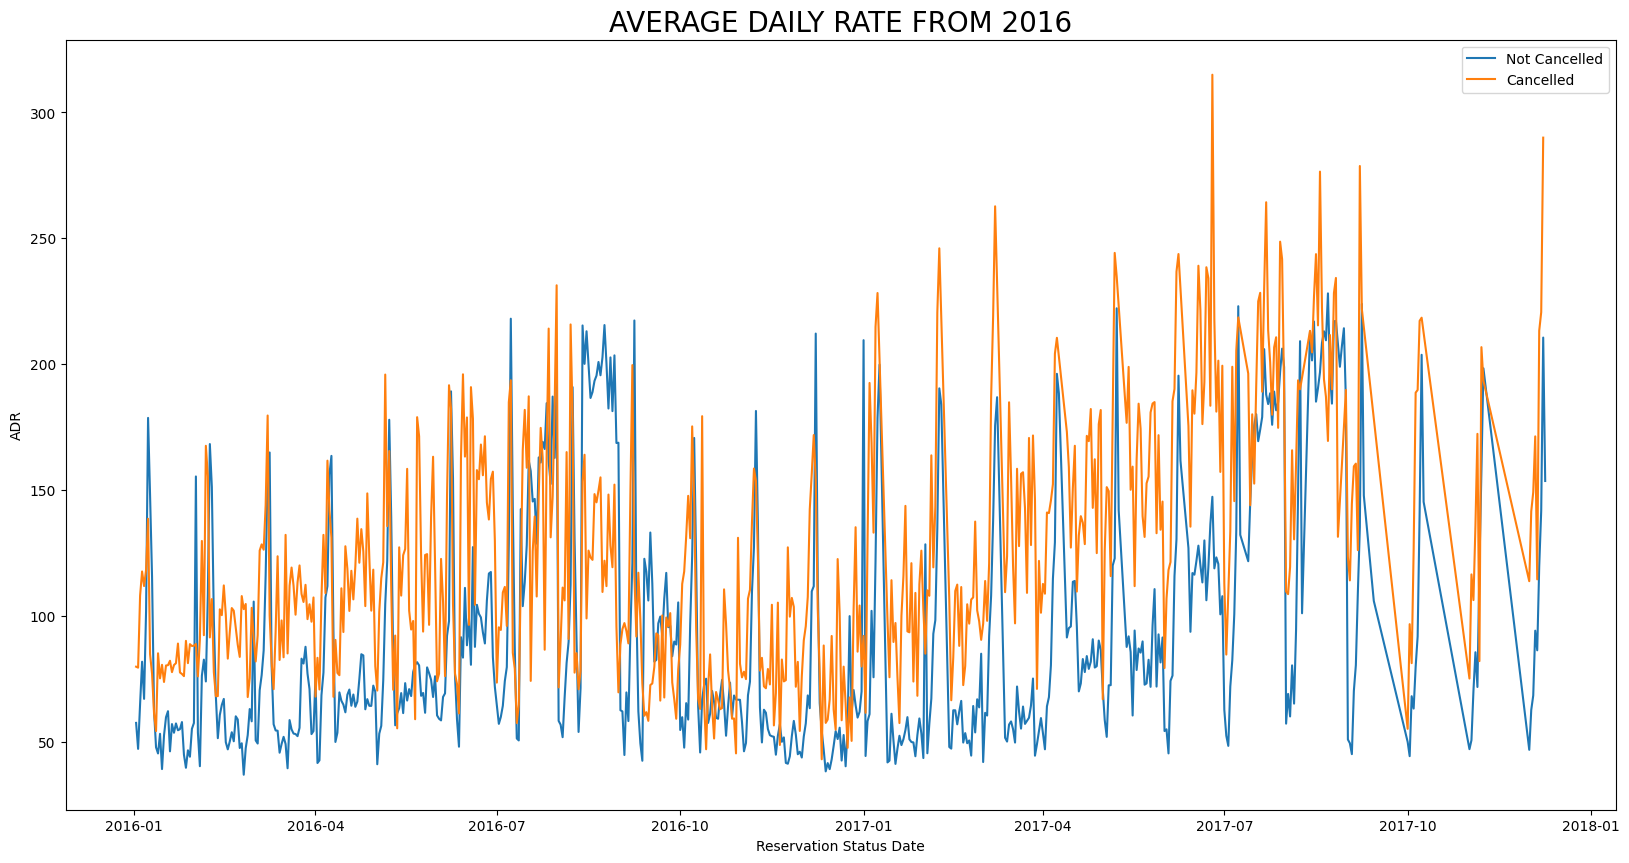

In [47]:
plt.figure(figsize = (20,10))
plt.title('AVERAGE DAILY RATE FROM 2016', fontsize = 20)
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'Cancelled')
plt.legend(fontsize = 10)
plt.xlabel('Reservation Status Date')
plt.ylabel('ADR')
plt.show()